In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('data/Employment Dataset.csv')

In [30]:
df.head()

,CGPA,Internships,Projects,Certifications,AptitudeTest Score,Soft Skills Rating,Extracurricular Activities,Placement Training,SSC Marks,HSC Marks,Placement Status
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [31]:
df.shape

(10000, 11)

In [32]:
df.isna().sum()

CGPA                          0
Internships                   0
Projects                      0
Certifications                0
AptitudeTest Score            0
Soft Skills Rating            0
Extracurricular Activities    0
Placement Training            0
SSC Marks                     0
HSC Marks                     0
Placement Status              0
dtype: int64

In [33]:
df.duplicated().sum()

72

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CGPA                        10000 non-null  float64
 1   Internships                 10000 non-null  int64  
 2   Projects                    10000 non-null  int64  
 3   Certifications              10000 non-null  int64  
 4   AptitudeTest Score          10000 non-null  int64  
 5   Soft Skills Rating          10000 non-null  float64
 6   Extracurricular Activities  10000 non-null  object 
 7   Placement Training          10000 non-null  object 
 8   SSC Marks                   10000 non-null  int64  
 9   HSC Marks                   10000 non-null  int64  
 10  Placement Status            10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [35]:
df.nunique()

CGPA                          27
Internships                    3
Projects                       4
Certifications                 4
AptitudeTest Score            31
Soft Skills Rating            19
Extracurricular Activities     2
Placement Training             2
SSC Marks                     36
HSC Marks                     32
Placement Status               2
dtype: int64

In [36]:
df.describe()

,CGPA,Internships,Projects,Certifications,AptitudeTest Score,Soft Skills Rating,SSC Marks,HSC Marks
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [37]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features: {categorical_features}')

We have 8 numerical features: ['CGPA', 'Internships', 'Projects', 'Certifications', 'AptitudeTest Score', 'Soft Skills Rating', 'SSC Marks', 'HSC Marks']

We have 3 categorical features: ['Extracurricular Activities', 'Placement Training', 'Placement Status']


In [38]:
df.head(2)

,CGPA,Internships,Projects,Certifications,AptitudeTest Score,Soft Skills Rating,Extracurricular Activities,Placement Training,SSC Marks,HSC Marks,Placement Status
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed


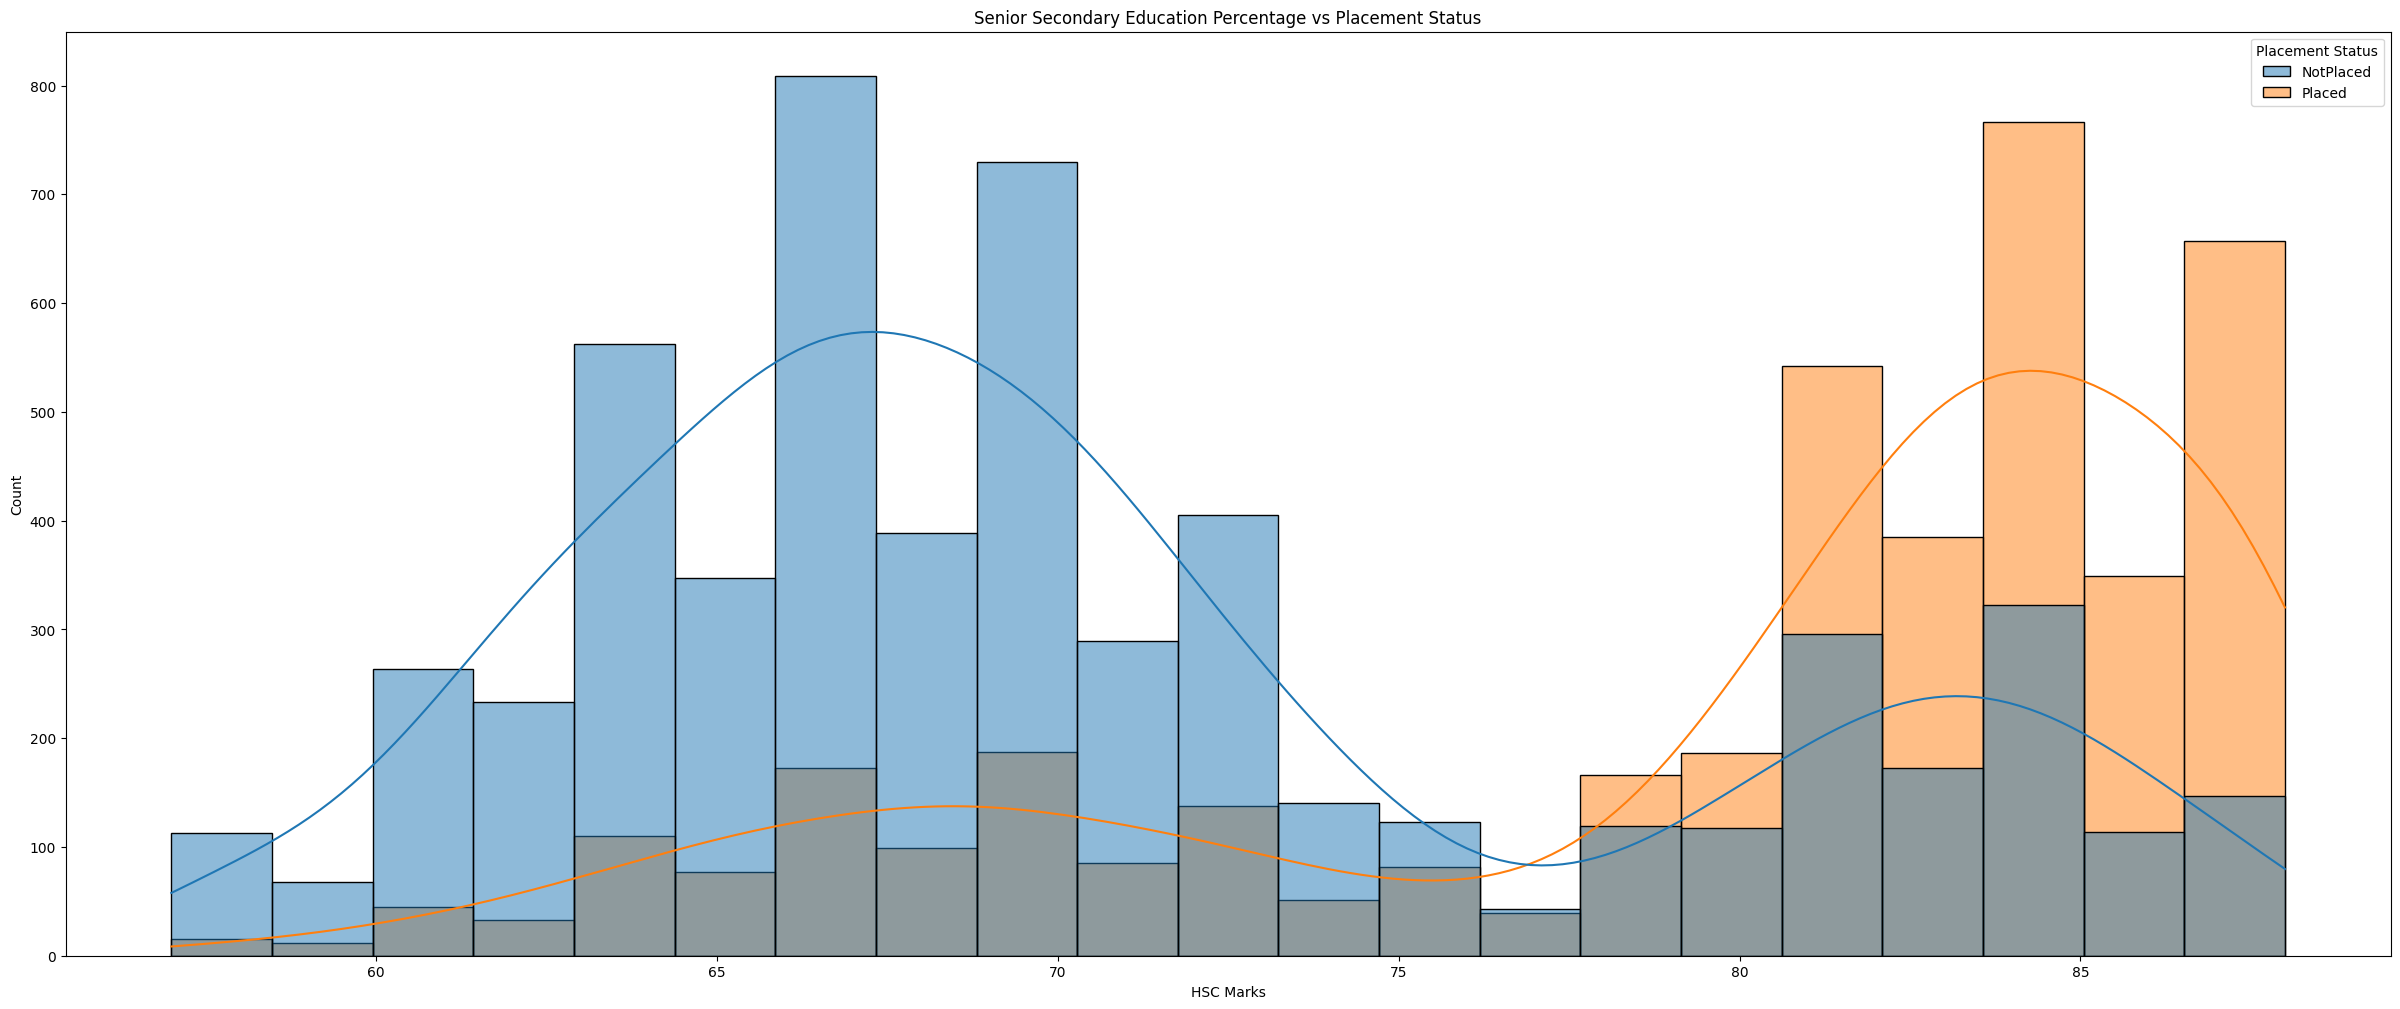

In [27]:
sns.histplot(data=df,x='HSC Marks',kde=True,hue='Placement Status')
plt.title('Senior Secondary Education Percentage vs Placement Status')
plt.show()

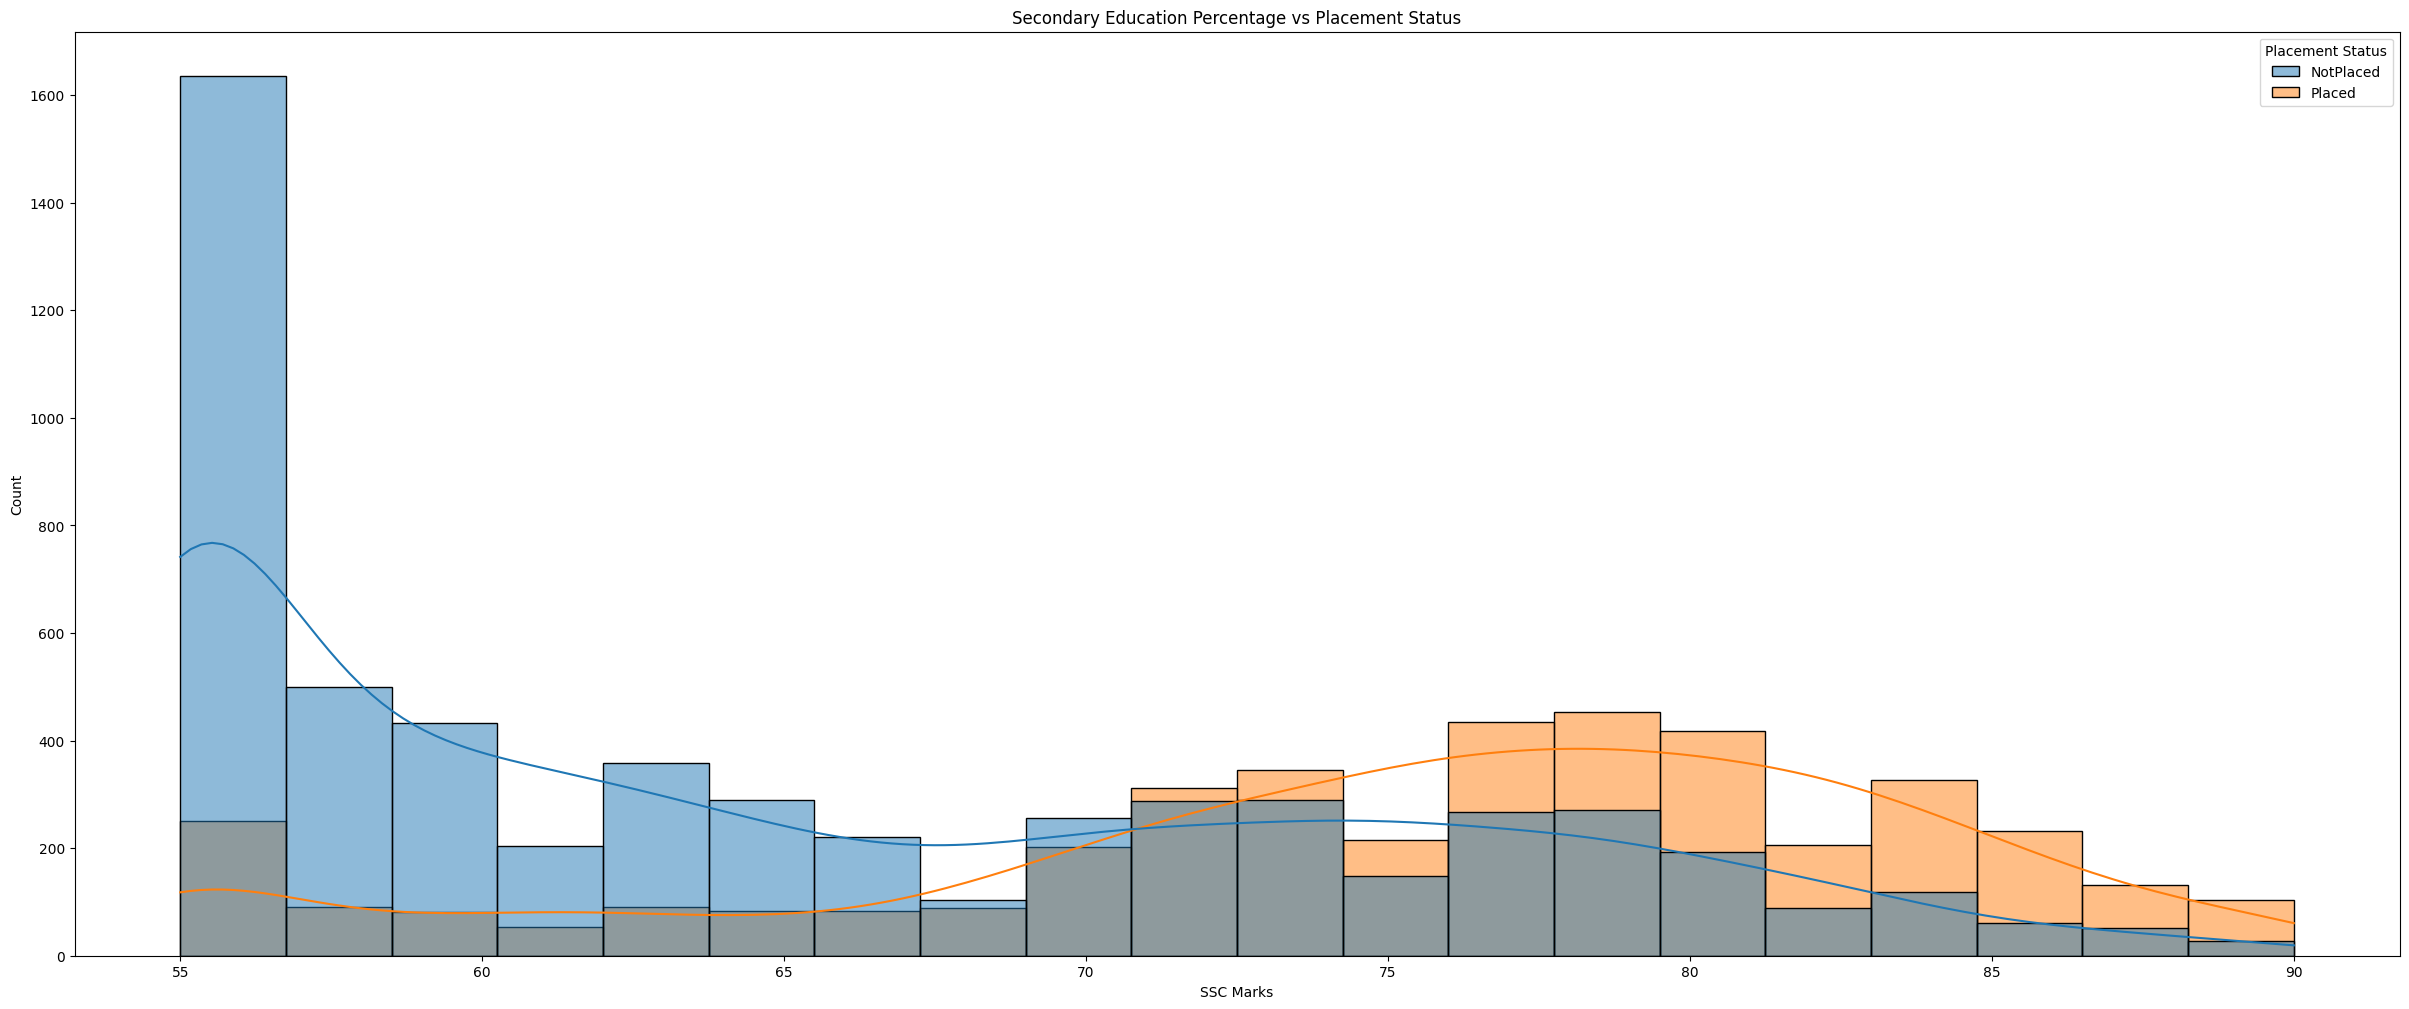

In [39]:
sns.histplot(data=df, x='SSC Marks', kde=True, hue='Placement Status')
plt.title('Secondary Education Percentage vs Placement Status')
plt.show()

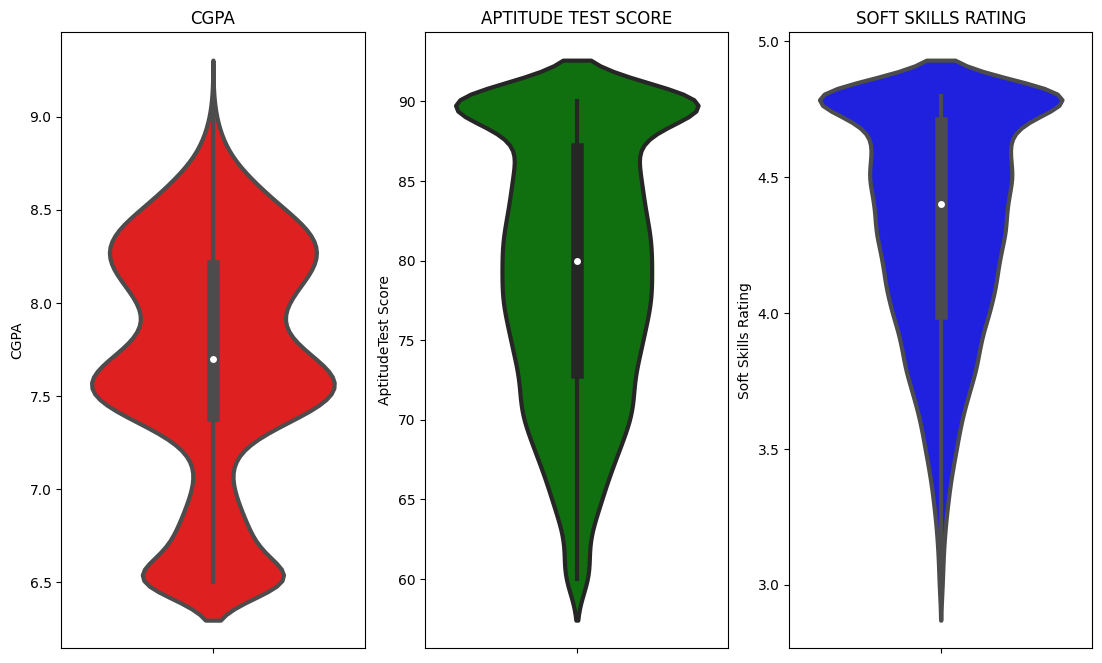

In [42]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('CGPA')
sns.violinplot(y='CGPA',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('APTITUDE TEST SCORE')
sns.violinplot(y='AptitudeTest Score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('SOFT SKILLS RATING')
sns.violinplot(y='Soft Skills Rating',data=df,color='blue',linewidth=3)
plt.show()

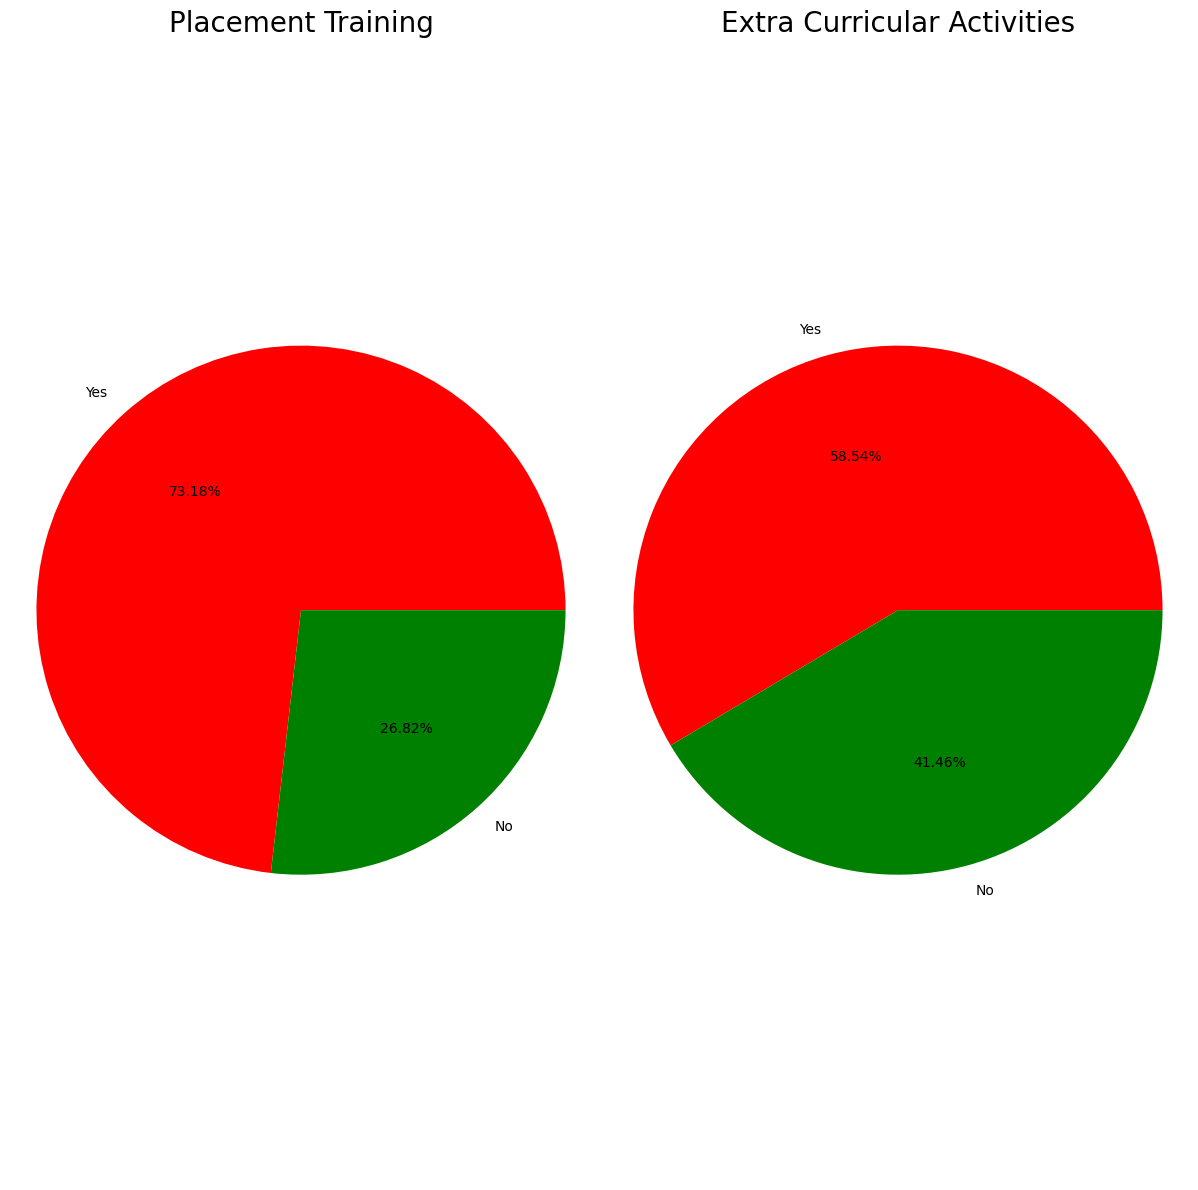

In [43]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Placement Training'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Placement Training', fontsize=20)
plt.axis('equal')

plt.subplot(1, 5, 2)
size = df['Extracurricular Activities'].value_counts()
labels = size.index
colors = ['red', 'green']
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Extra Curricular Activities', fontsize=20)
plt.axis('equal')

plt.tight_layout()
plt.show()